# EDA and Data Visualization of GHG Emissions in the Philippines

In [15]:
library(tidyverse)
library(lubridate)
library(ggplot2)
library(DT)
library(skimr)
library(janitor)
library(reshape2)

In [16]:
options(repr.plot.width = 15, repr.plot.height = 9, repr.plot.res=140, repr.plot.pointsize=12)

In [17]:
# Replace with your actual file path if local
ghg_data <- read_csv("phil_synthetic_ghg_emissions_2010_2050.csv", show_col_types = FALSE)

head(ghg_data)

Year,Sector,CO2,CH4,N2O,HFCs
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2010,Biological Treatment of Solid Waste,NA,35.0000,32.0000,NA
2015,Biological Treatment of Solid Waste,NA,70.9360,40.2820,NA
2020,Biological Treatment of Solid Waste,NA,391.6640,222.3350,NA
2021,Biological Treatment of Solid Waste,NA,379.8651,212.4067,NA
2022,Biological Treatment of Solid Waste,NA,415.5315,231.4402,NA
2023,Biological Treatment of Solid Waste,NA,451.1979,250.4737,NA


In [18]:
# Basic stat summary
summary(ghg_data)

      Year         Sector               CO2                 CH4          
 Min.   :2010   Length:1119        Min.   :-132994.7   Min.   : -216.99  
 1st Qu.:2026   Class :character   1st Qu.:    173.9   1st Qu.:    0.41  
 Median :2034   Mode  :character   Median :   1280.7   Median :   26.05  
 Mean   :2034                      Mean   :  26980.3   Mean   : 4699.63  
 3rd Qu.:2042                      3rd Qu.:  20421.7   3rd Qu.: 2792.00  
 Max.   :2050                      Max.   : 520983.5   Max.   :41404.45  
                                   NA's   :398         NA's   :432       
      N2O                 HFCs      
 Min.   :  -33.305   Min.   :  771  
 1st Qu.:    5.858   1st Qu.: 4566  
 Median :  222.392   Median : 6412  
 Mean   : 1523.090   Mean   : 6328  
 3rd Qu.: 1380.540   3rd Qu.: 8257  
 Max.   :14938.243   Max.   :10103  
 NA's   :499         NA's   :1086   

In [19]:
# Check for missing values
colSums(is.na(ghg_data))

Year Sector    CO2    CH4    N2O   HFCs 
     0      0    398    432    499   1086

In [20]:
# Unique sectors
unique_sectors <- unique(ghg_data$Sector)
length(unique_sectors)  # Number of sectors
unique_sectors

[1] 34

[1] "Biological Treatment of Solid Waste"                       
 [2] "Biomass Burning - Forests"                                 
 [3] "Biomass Burning in Croplands and Grasslands"               
 [4] "Biomass Carbon Stock"                                      
 [5] "Biomass Carbon Stock Agroforestry/Perennial Crop"          
 [6] "Biomass Carbon Stock Deforestation"                        
 [7] "Biomass Carbon Stock Silvopasture"                         
 [8] "Chemical Industry"                                         
 [9] "Direct N2O Emissions from Managed Soils"                   
[10] "Direct N2O Emissions from Manure Management"               
[11] "Domestic Aviation"                                         
[12] "Energy Industries"                                         
[13] "Enteric Fermentation"                                      
[14] "Fugitive Emissions - Oil and Natural Gas"                  
[15] "Fugitive Emissions - Solid Fuels"                          
[16] "Incineration and Open Burning of Waste"                    
[17] "Indirect N2O Emissions from Managed Soils"                 
[18] "Liming"                                                    
[19] "Manufacturing Industries and Construction"                 
[20] "Manure Management"                                         
[21] "Metal Industry"                                            
[22] "Mineral Industry"                                          
[23] "Non-Energy Products from Fuels and Solvent Use"            
[24] "Other Sectors"                                             
[25] "Other Transportation"                                      
[26] "Product Uses as Substitutes for Ozone-Depleting Substances"
[27] "Railways"                                                  
[28] "Rice Cultivation"                                          
[29] "Road Transport"                                            
[30] "Solid Waste Disposal"                                      
[31] "TOTAL NATIONAL GHG EMISSIONS (CO2-e)"                      
[32] "Urea Application"                                          
[33] "Wastewater Treatment and Discharge"                        
[34] "Water-borne Navigation"

In [21]:
# tail(ghg_data, 100)

## **Descriptive Statistics by Gas and Sector**

### Summary Statistics for Each Gas (CO₂, CH₄, N₂O, HFCs)**

The table presents descriptive statistics for each greenhouse gas (CH₄, CO₂, HFCs, and N₂O) in the Philippines from 2010 to 2050 based on your synthetic dataset. The summary shows major differences in scale, central tendency, and spread between gases.

In [22]:
# Gather the gas columns into long format
ghg_long <- ghg_data %>%
  tidyr::pivot_longer(cols = c(CO2, CH4, N2O, HFCs), names_to = "Gas", values_to = "Emissions")

# Remove rows with NA emissions
ghg_long <- ghg_long %>% filter(!is.na(Emissions))

# Summary statistics by Gas
summary_stats_gas <- ghg_long %>%
  group_by(Gas) %>%
  summarise(
    count = n(),
    mean = mean(Emissions, na.rm=TRUE),
    median = median(Emissions, na.rm=TRUE),
    sd = sd(Emissions, na.rm=TRUE),
    min = min(Emissions, na.rm=TRUE),
    max = max(Emissions, na.rm=TRUE),
    sum = sum(Emissions, na.rm=TRUE)
  )
print(summary_stats_gas)

# A tibble: 4 × 8
  Gas   count   mean median     sd       min     max       sum
  <chr> <int>  <dbl>  <dbl>  <dbl>     <dbl>   <dbl>     <dbl>
1 CH4     687  4700.   26.0  9862.    -217.   41404.  3228648.
2 CO2     721 26980. 1281.  86247. -132995.  520983. 19452802.
3 HFCs     33  6328. 6412.   2394.     771    10103.   208811.
4 N2O     620  1523.  222.   2906.     -33.3  14938.   944316.


### Visualizing the Distribution of Emissions by Gas

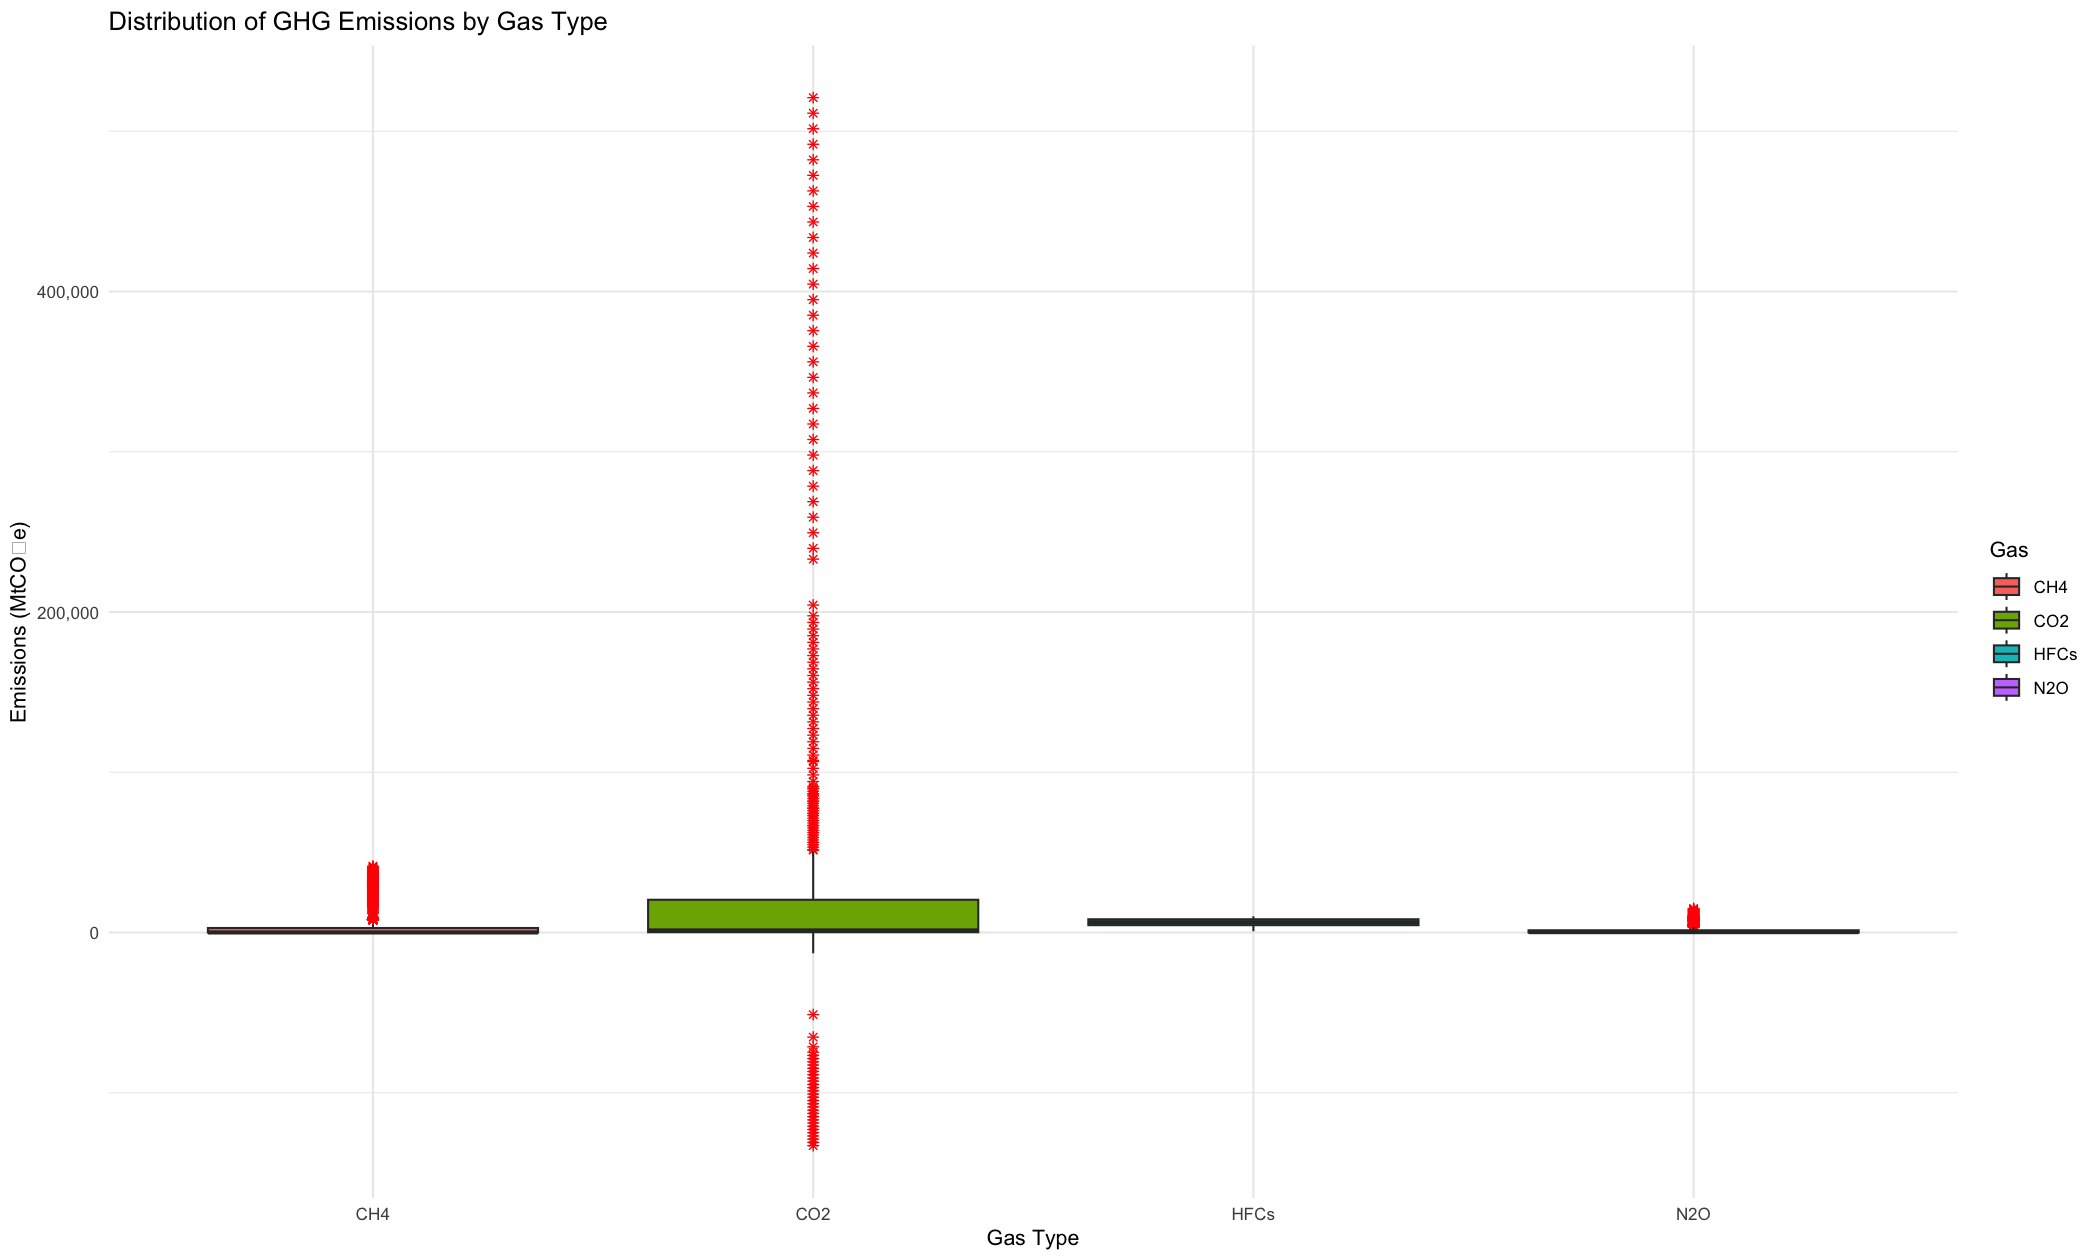

In [23]:
# --- Boxplot: Emissions Distribution by Gas ---
# This highlights: Median and IQR, Outliers (esp. CH4 and CO2), Skewness (e.g., CH4’s low median vs. high mean)

ggplot(ghg_long, aes(x = Gas, y = Emissions, fill = Gas)) +
  geom_boxplot(outlier.colour = "red", outlier.shape = 8) +
  scale_y_continuous(labels = scales::comma) +
  labs(title = "Distribution of GHG Emissions by Gas Type",
       y = "Emissions (MtCO₂e)", x = "Gas Type") +
  theme_minimal()

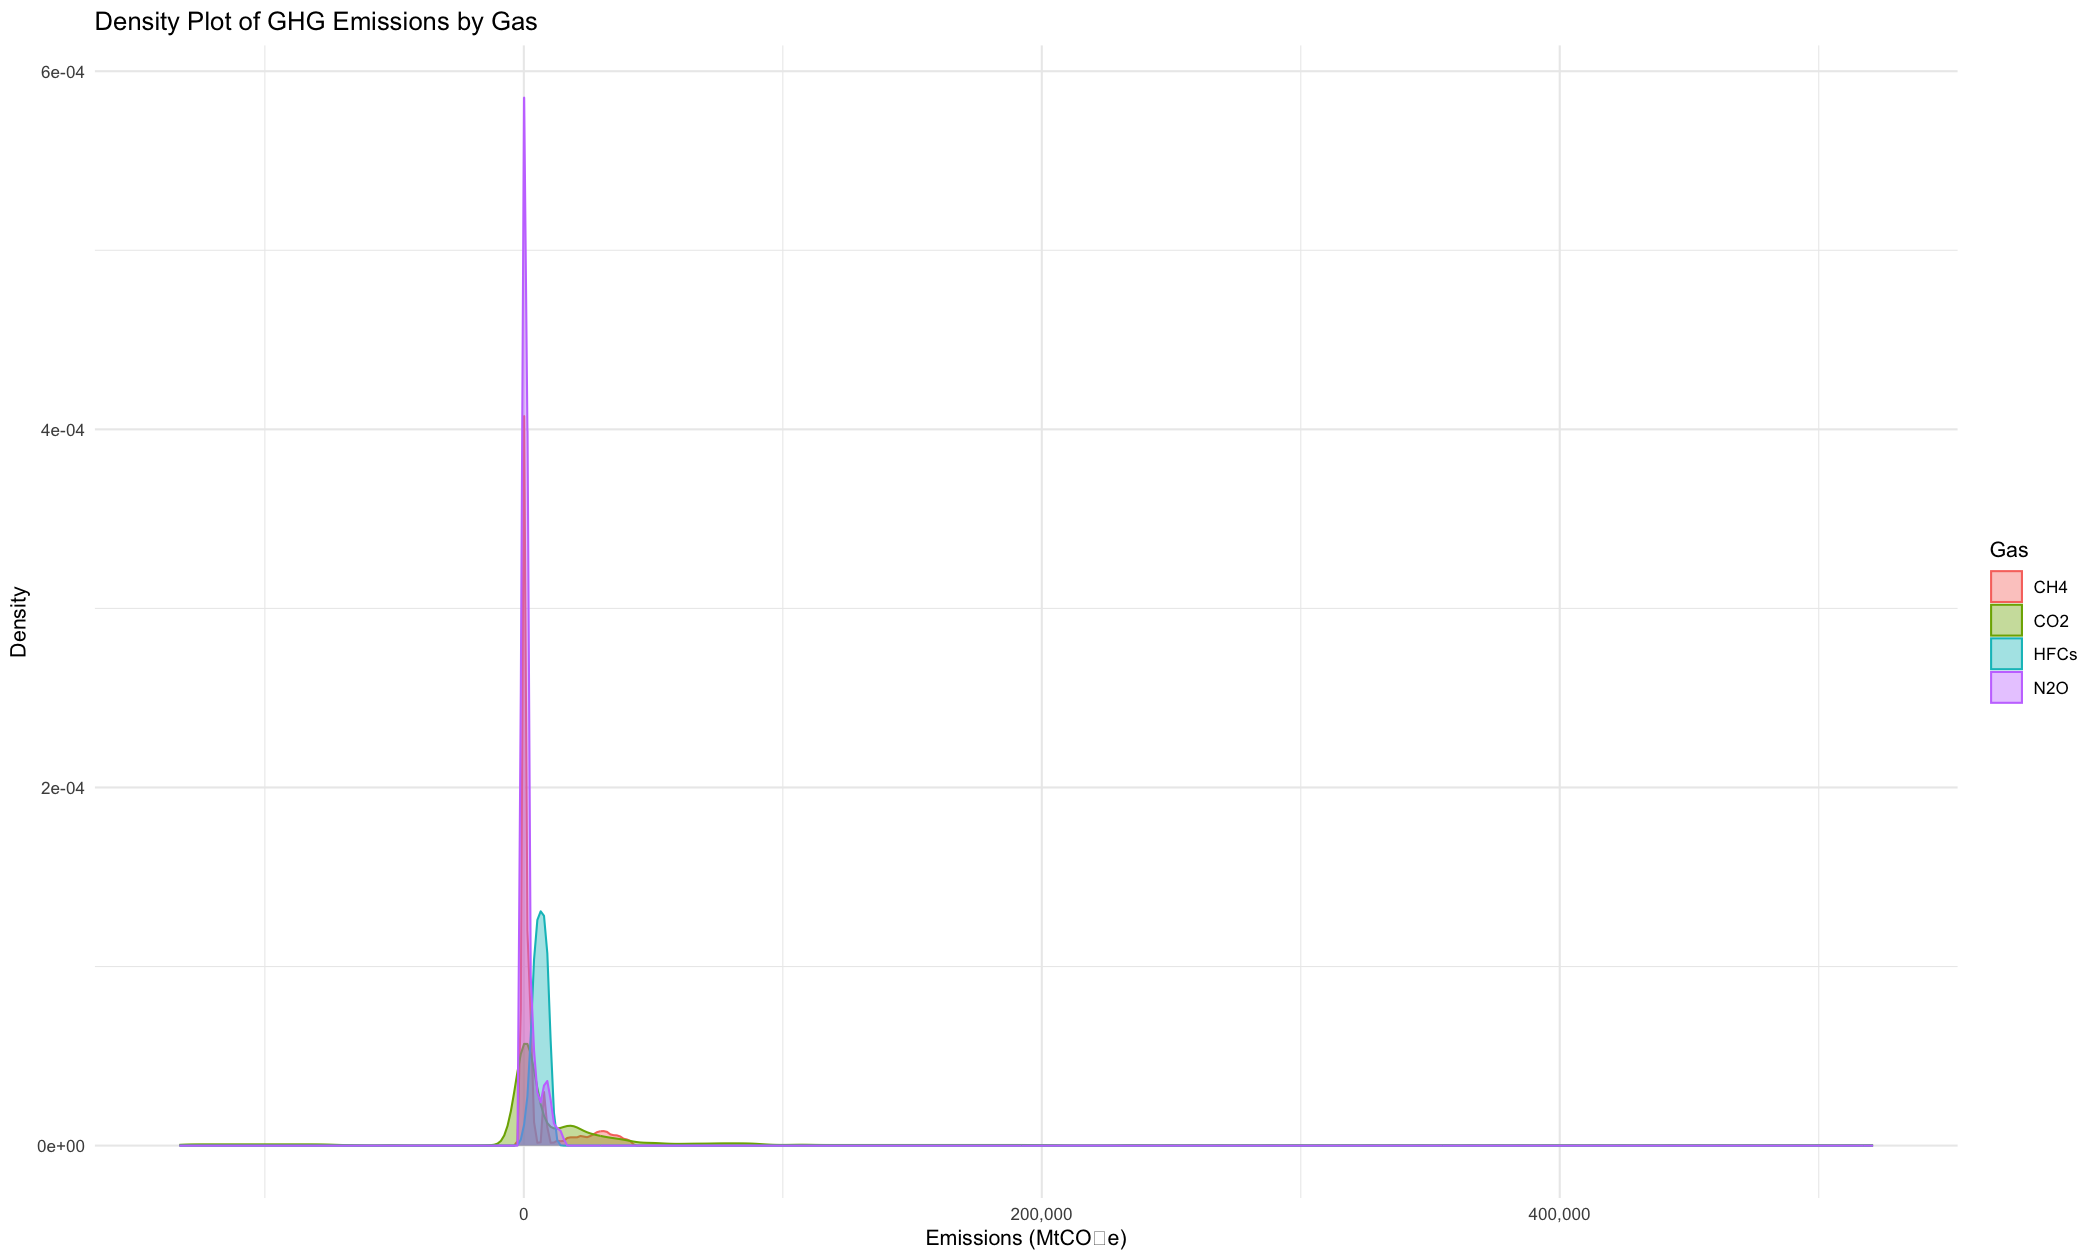

In [24]:
# --- Density Plot: Emissions by Gas (Optional with log scale) ---
# This shows: How emissions are concentrated or dispersed and Clearer insight into overlapping distributions

ggplot(ghg_long, aes(x = Emissions, fill = Gas, color = Gas)) +
  geom_density(alpha = 0.4) +
  scale_x_continuous(labels = scales::comma) +
  labs(title = "Density Plot of GHG Emissions by Gas",
       x = "Emissions (MtCO₂e)", y = "Density") +
  theme_minimal()

### Summary Statistics by Sector

In [29]:
summary_stats_sector <- ghg_long %>%
  group_by(Sector, Gas) %>%
  summarise(
    mean = mean(Emissions, na.rm=TRUE),
    sum = sum(Emissions, na.rm=TRUE),
    min = min(Emissions, na.rm=TRUE),
    max = max(Emissions, na.rm=TRUE),
    .groups = 'drop'
  )
print(head(summary_stats_sector, 20)) # Show first 20 rows

# summary_stats_sector

# A tibble: 20 × 6
   Sector                                Gas       mean     sum     min      max
   <chr>                                 <chr>    <dbl>   <dbl>   <dbl>    <dbl>
 1 Biological Treatment of Solid Waste   CH4    8.31e+2  2.74e4  3.5 e1  1.41e+3
 2 Biological Treatment of Solid Waste   N2O    4.53e+2  1.49e4  3.2 e1  7.64e+2
 3 Biomass Burning - Forests             CH4    7   e+0  2.17e2  7   e0  7   e+0
 4 Biomass Burning - Forests             CO2    7.51e+2  2.40e4  7.45e2  9.37e+2
 5 Biomass Burning - Forests             N2O    2   e+0  6.2 e1  2   e0  2   e+0
 6 Biomass Burning in Croplands and Gra… CH4    4.94e+2  1.63e4  2.86e2  6.32e+2
 7 Biomass Burning in Croplands and Gra… N2O    1.09e+2  3.59e3  9.6 e1  1.18e+2
 8 Biomass Carbon Stock                  CO2    1.82e+4  5.99e5  1.11e4  3.12e+4
 9 Biomass Carbon Stock Agroforestry/Pe… CO2    2.52e+4  8.33e5 -1.30e4  5.00e+4
10 Biomass Carbon Stock Deforestation    CO2    6.63e+4  2.19e6  1.61e4  9.11e+4
11 Biomas

### Heatmap of Mean Emissions by Sector and Gas

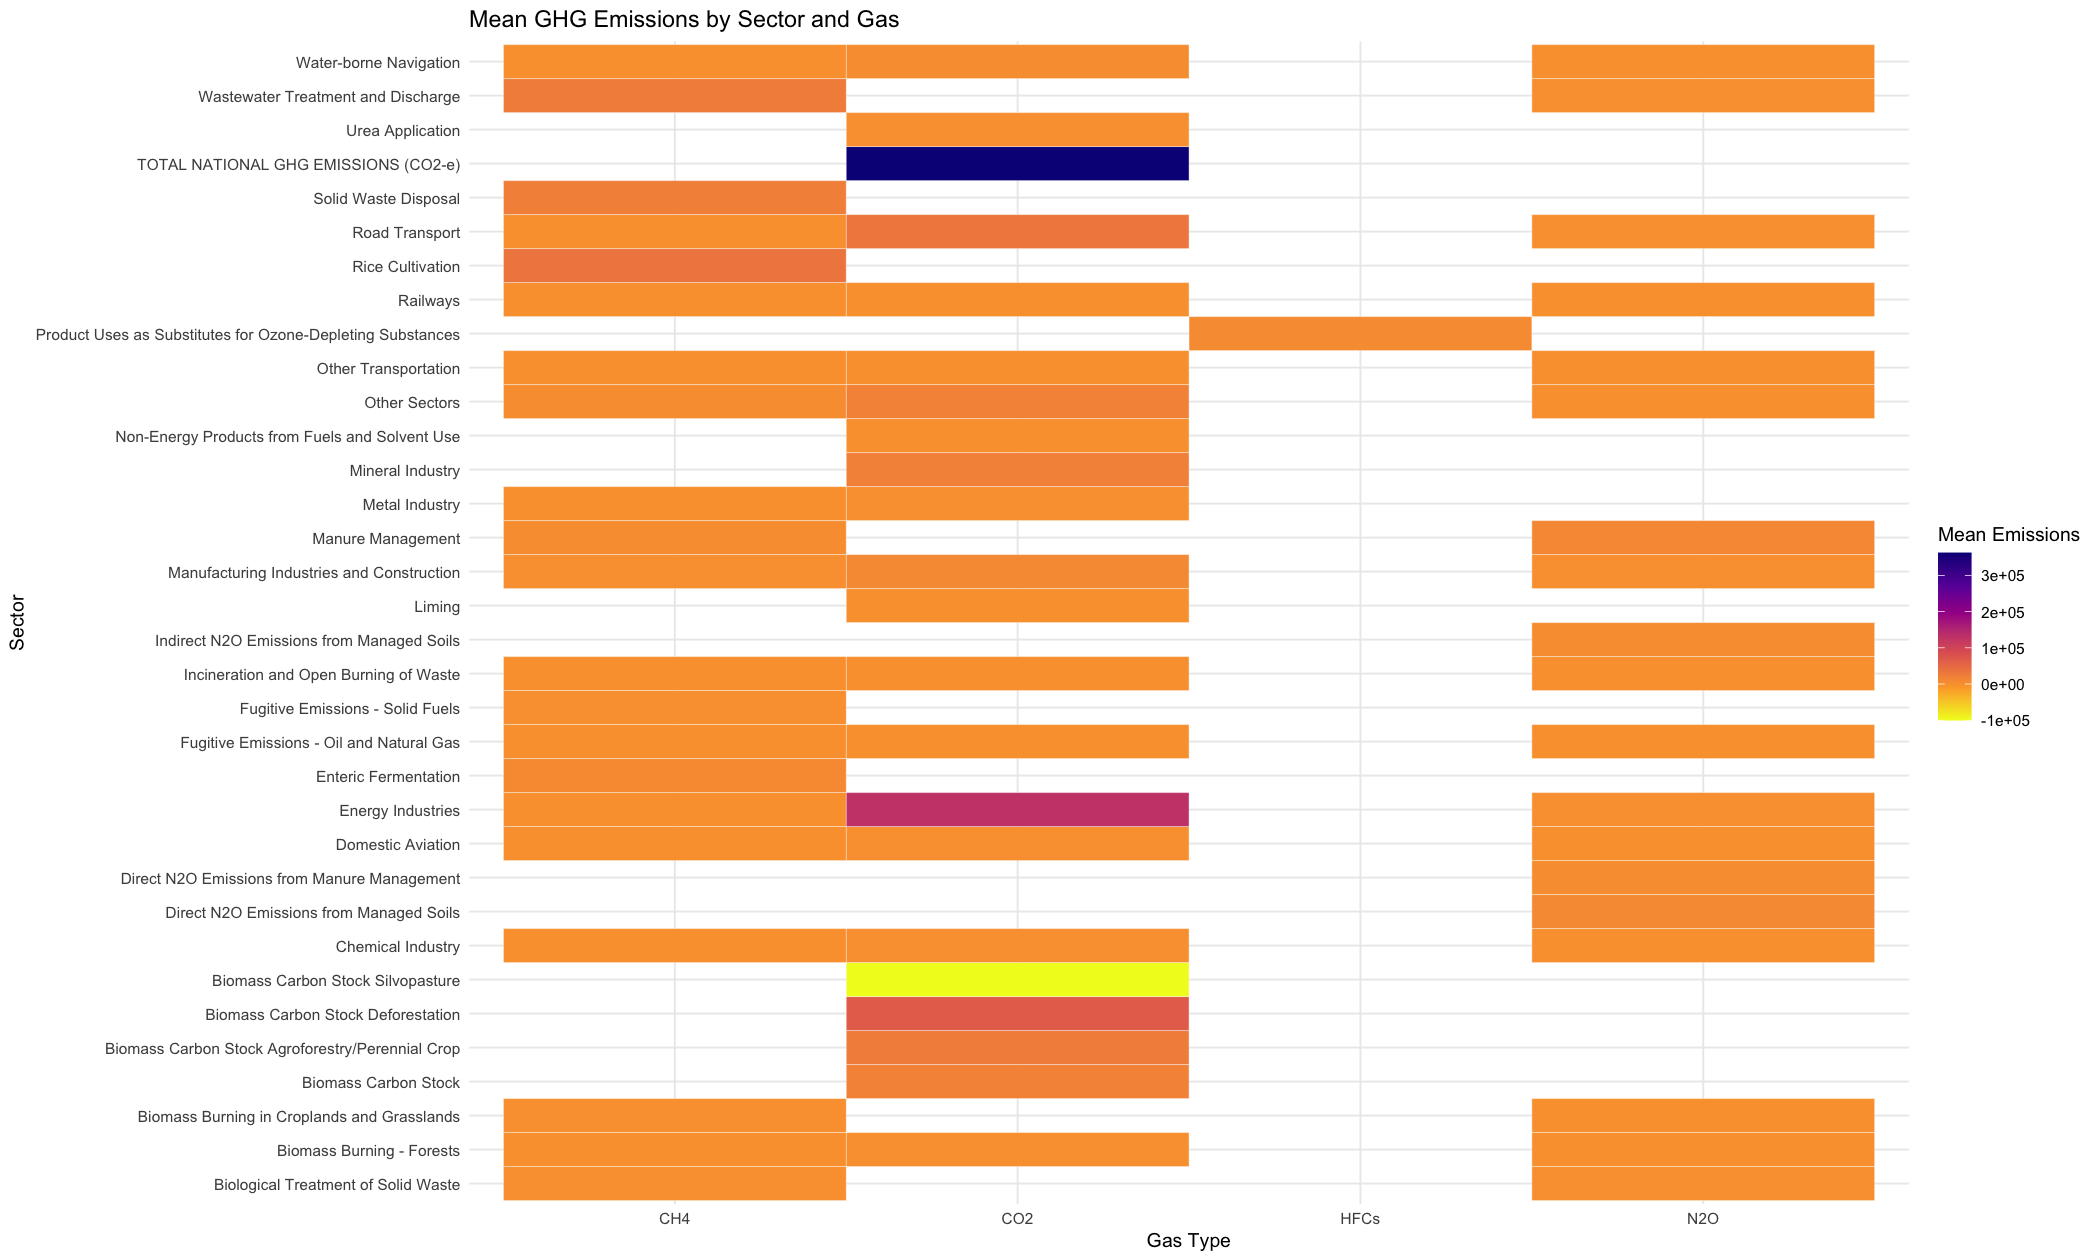

In [26]:
summary_stats_sector_clean <- summary_stats_sector %>%
  mutate(Sector = stringr::str_wrap(Sector, width = 100))

ggplot(summary_stats_sector_clean, aes(x = Gas, y = Sector, fill = mean)) +
  geom_tile(color = "white") +
  scale_fill_viridis_c(option = "C", direction = -1) +
  labs(title = "Mean GHG Emissions by Sector and Gas",
       x = "Gas Type", y = "Sector", fill = "Mean Emissions") +
  theme_minimal(base_size = 10)

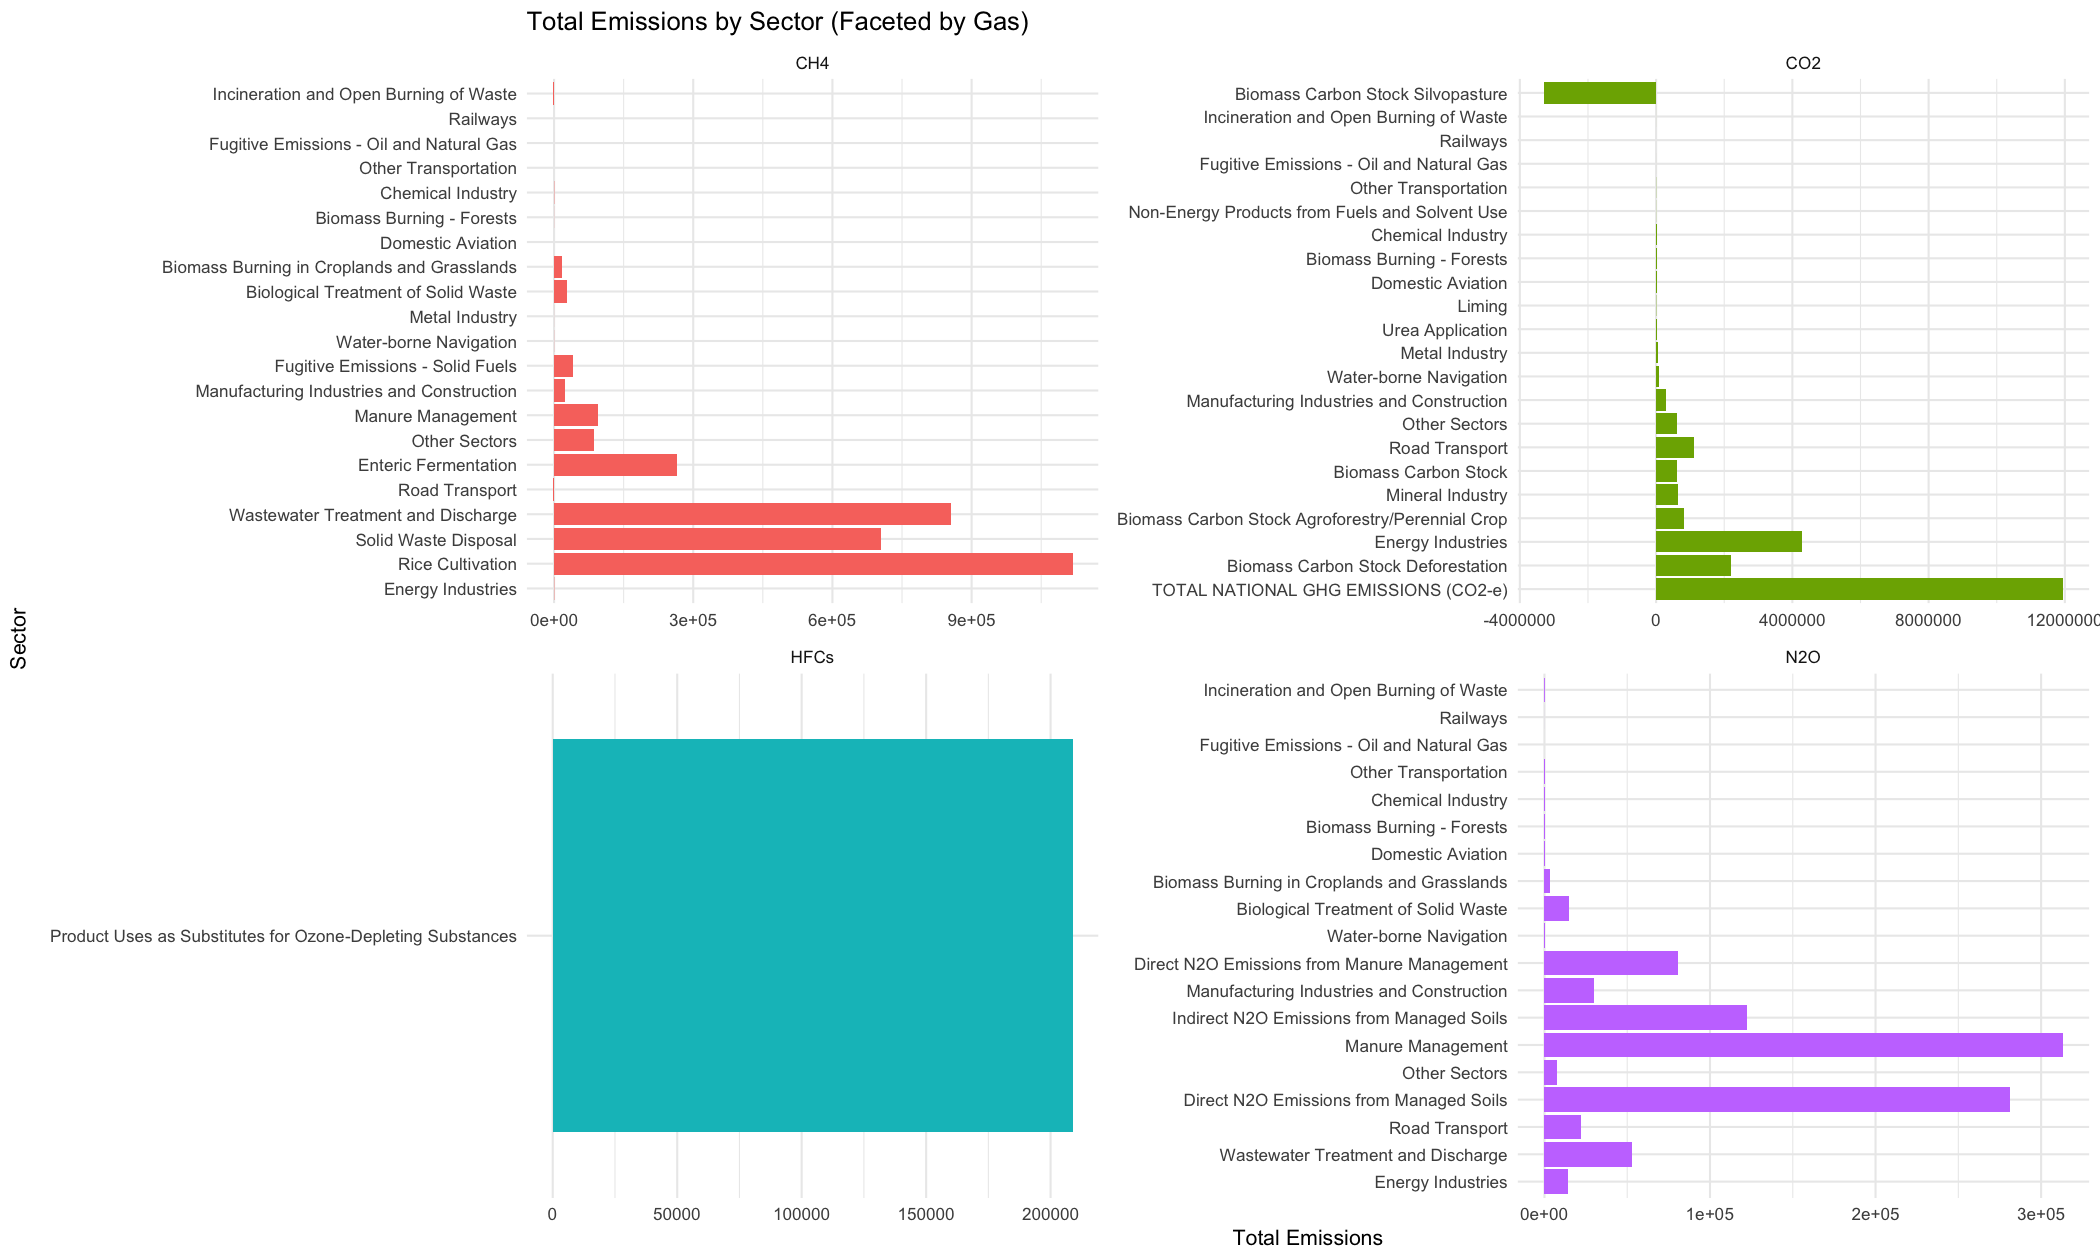

In [27]:
ggplot(summary_stats_sector_clean, aes(x = reorder(Sector, -sum), y = sum, fill = Gas)) +
  geom_col() +
  facet_wrap(~Gas, scales = "free") +
  coord_flip() +
  labs(title = "Total Emissions by Sector (Faceted by Gas)",
       x = "Sector", y = "Total Emissions") +
  theme_minimal() +
  theme(legend.position = "none")


### Overall Distribution Patterns

**CO2 Shows Highest Magnitude**  - Mean emissions: `26,980` units
  - Largest range: `-132,995` to `520,983` units
  - Highest total sum: `19,452,802` units
  - Shows significant variability (SD: `86,247`)

**CH4 Exhibits High Variability**  - Second-highest mean: `4,700` units
  - Large standard deviation: `9,862` units
  - Range spans negative to positive values: `-217` to `41,404` units
  - Total sum: `3,228,648` units

**N2O Shows Moderate Levels**  - Mean emissions: `1,523` units
  - More consistent distribution (SD: `2,906`)
  - Range: `-33.3` to `14,938` units
  - Total sum: `944,316` units

**HFCs Have Most Consistent Pattern**  - Highest median-to-mean ratio
  - Smallest standard deviation: `2,394` units
  - Most constrained range: `771` to `10,103` units
  - Lowest total emissions: `208,811` units


#### Key Observations

1. **Distribution Characteristics**  - All gases except HFCs show right-skewed distributions (median < mean)
  - Presence of negative values indicates removals/sequestration activities
  - Large standard deviations suggest significant variability across sectors


2. **Sector-Specific Patterns**  - Energy Industries dominates CO2 emissions (mean: `129,918` units)
  - Enteric Fermentation leads CH4 emissions (mean: `8,043` units)
  - Direct N2O Emissions from Managed Soils show highest N2O levels (mean: `8,531` units)
  - Chemical Industry shows relatively stable, low-variability patterns


3. **Data Quality Notes**  - Different sample sizes across gases (CO2: 721, CH4: 687, N2O: 620, HFCs: 33)
  - Some sectors show constant values, suggesting standardized reporting
  - Negative values indicate carbon removal/sequestration activities

### **Summary**

These patterns highlight the dominance of CO2 emissions overall, with methane and nitrous oxide significant in specific sectors, and some sectors potentially acting as carbon sinks.

- The **Energy Industries** sector has the highest mean and sum of CO2 emissions (mean ~129,918; sum ~4,287,306), highlighting it as a major source.
- **Biomass Carbon Stock Deforestation** shows very high CO2 emissions (mean ~66,309; sum ~2,188,189), indicating deforestation’s large impact.
- Some sectors, like **Biomass Carbon Stock Silvopasture**, show negative emissions (mean ~-100,099; sum ~-3,303,278), possibly reflecting carbon sequestration or data adjustments.
- **Enteric Fermentation** is a significant source of CH4 emissions (mean ~8,043; sum ~265,424).
- Other sectors like **Direct N2O Emissions from Managed Soils** have high N2O emissions (mean ~8,530; sum ~281,511).
- CO2 emissions dominate both in frequency and magnitude, especially from energy and deforestation sectors.
- Methane emissions are notable in agriculture-related sectors like Enteric Fermentation and waste treatment.
- Negative emission values in some sectors suggest carbon sequestration or data corrections, important for understanding net emissions.
- The variation in emissions (high standard deviations) indicates diverse emission levels across time or subcategories within gases and sectors.